In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Define the tickers
tickers = ['XLF', 'XLU', 'QQQ', 'SPY', 'XLP', 'EWZ', 'EWH', 'XLY', 'XLE']
tickers = ['XLF']

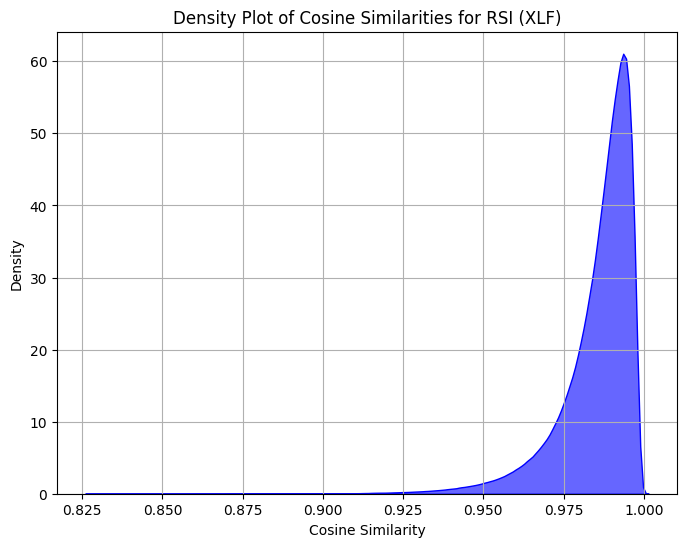

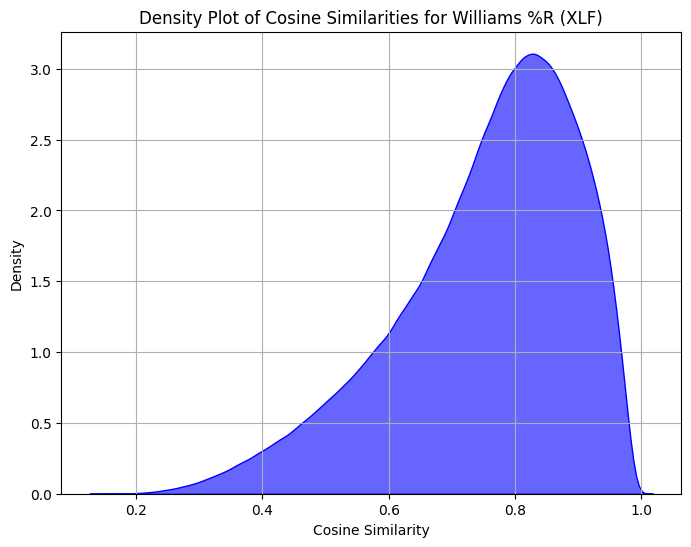

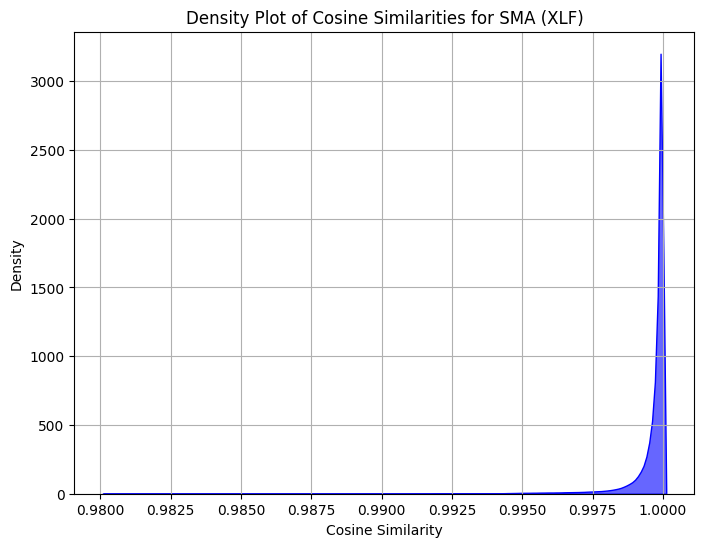

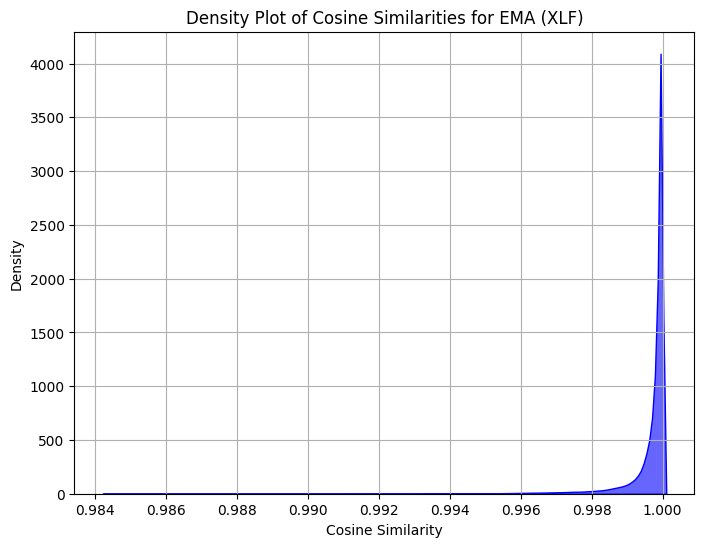

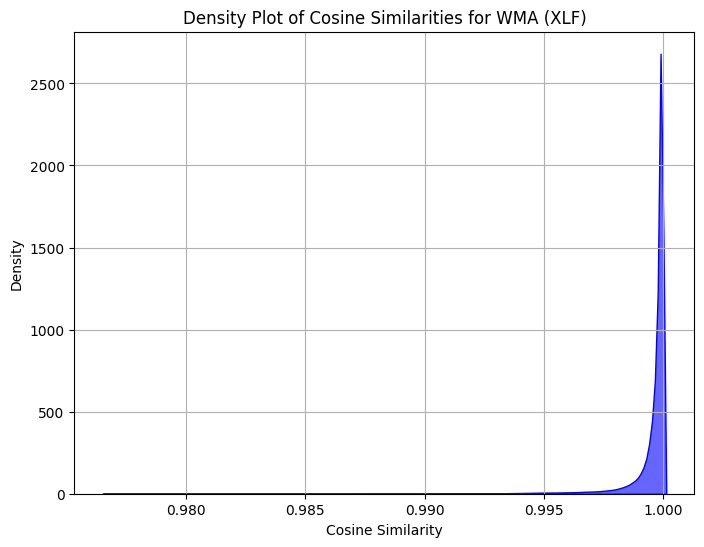

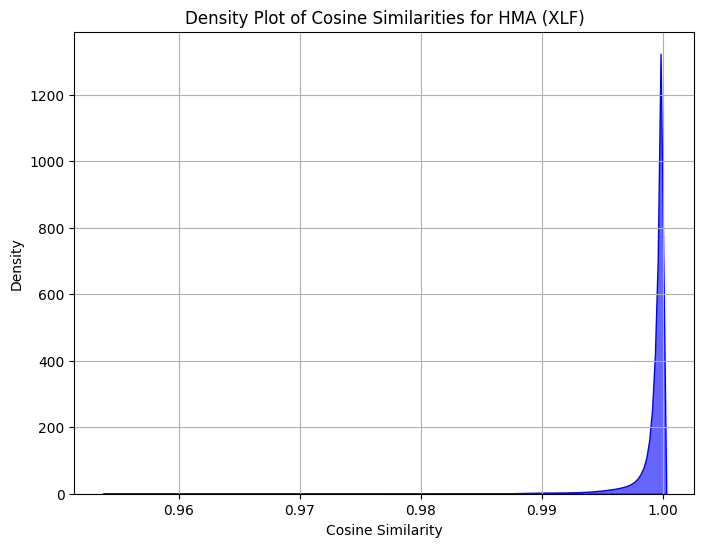

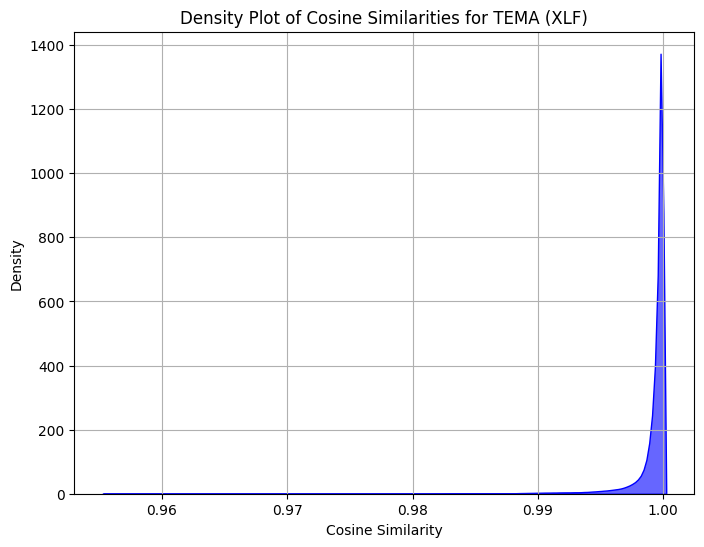

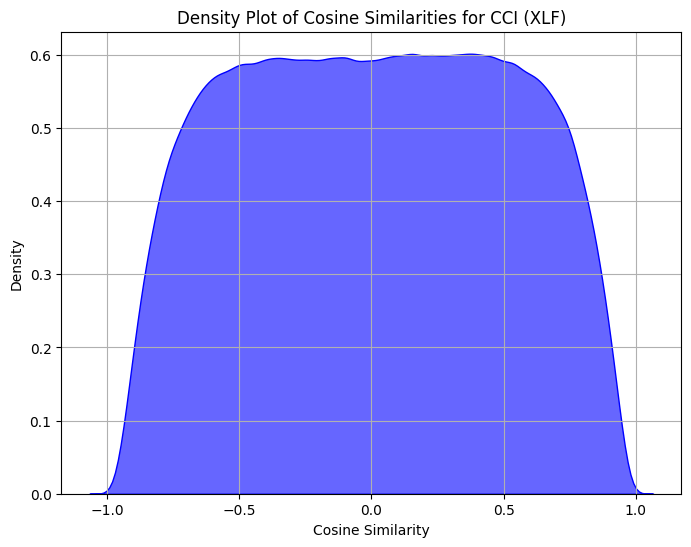

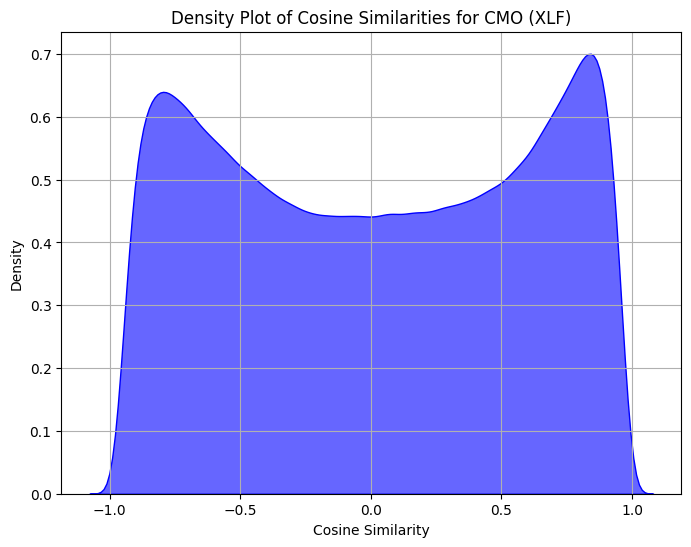

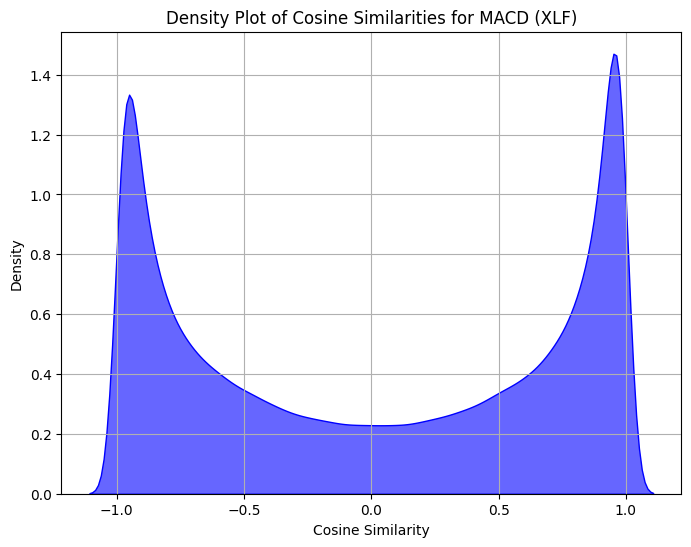

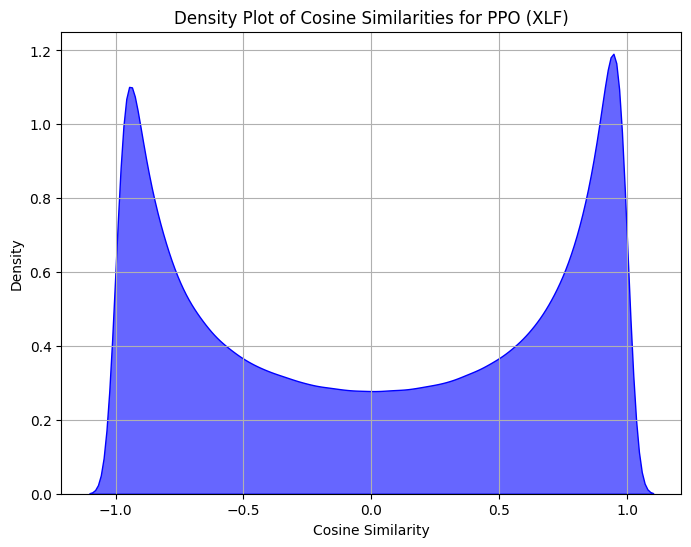

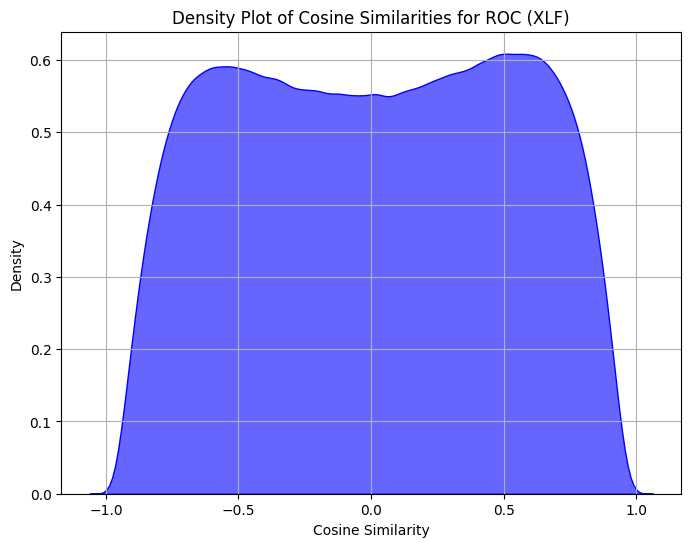

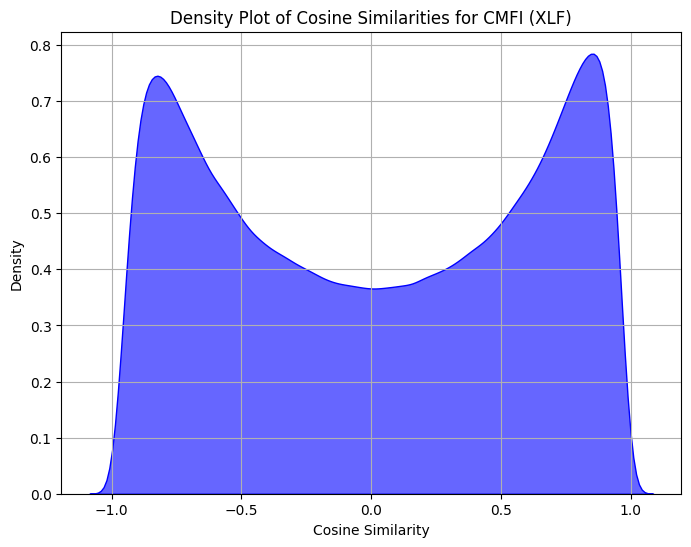

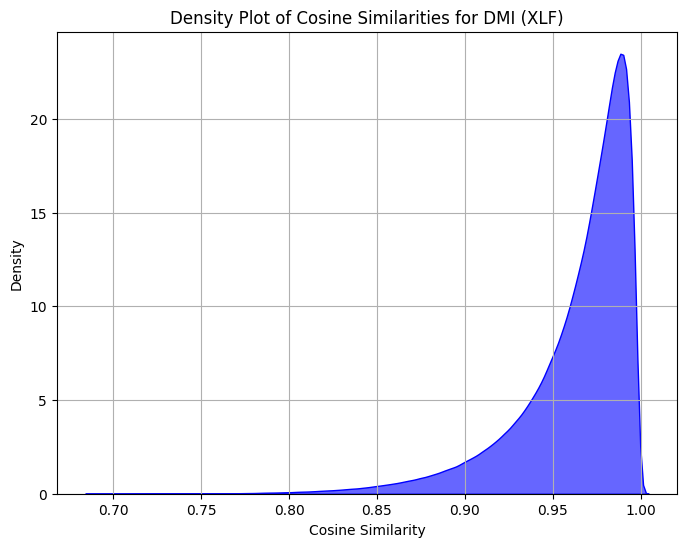

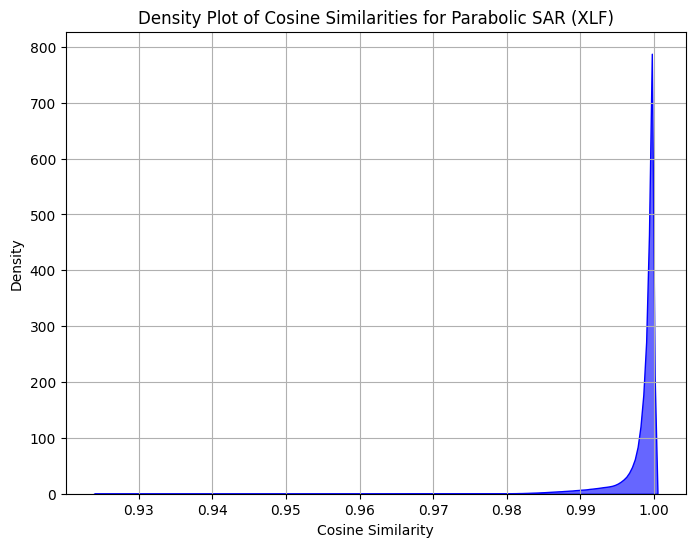

In [22]:
# Load the data
for ticker in tickers:
    df = pd.read_csv(f'./data/2002_to_2012/windows/{ticker}_windows.csv')

    # Convert the string representation of lists back to actual lists
    for col in df.columns:
        if col not in ['Date', 'Label']:  # Skip the Date column
            df[col] = df[col].apply(eval)  # Convert string to list
    
    # Loop through each column (technical indicator)
    for col in df.columns:
        if col in ['Date', 'Label']:  # Skip the Date column
            continue

        # Extract the lists for the column
        lists = np.array(df[col].tolist())  # Convert to a 2D NumPy array

        # Compute cosine similarities for all pairs
        cosine_sim_matrix = cosine_similarity(lists)
        # Extract the upper triangle of the similarity matrix (excluding the diagonal)
        cosine_sim_values = cosine_sim_matrix[np.triu_indices_from(cosine_sim_matrix, k=1)]

        # Plot the density of cosine similarity values
        plt.figure(figsize=(8, 6))
        sns.kdeplot(cosine_sim_values, fill=True, color="blue", alpha=0.6)
        plt.title(f'Density Plot of Cosine Similarities for {col} ({ticker})')
        plt.xlabel('Cosine Similarity')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()